# The Artificial Neuron

f(z)=1/(1+exp(−z))

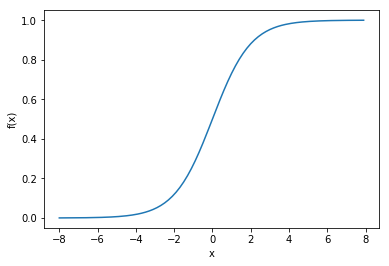

In [48]:
import matplotlib.pylab as plt
import numpy as np
x = np.arange(-8, 8, 0.1)
f = 1 / (1 + np.exp(-x))
plt.plot(x, f)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.show()

Effects of changing weight

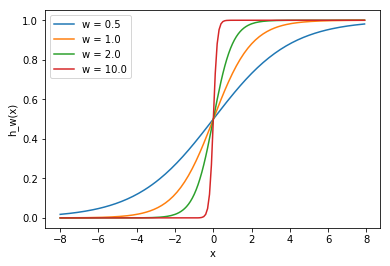

In [50]:
w1 = 0.5
w2 = 1.0
w3 = 2.0
w4 = 10.0
l1 = 'w = 0.5'
l2 = 'w = 1.0'
l3 = 'w = 2.0'
l4 = 'w = 10.0'
for w, l in [(w1, l1), (w2, l2), (w3, l3), (w4, l4)]:
    f = 1 / (1 + np.exp(-x*w))
    plt.plot(x, f, label=l)
plt.xlabel('x')
plt.ylabel('h_w(x)')
plt.legend(loc=2)
plt.show()

Here we can see that changing the weight changes the slope of the output of the sigmoid activation function, which is obviously useful if we want to model different strengths of relationships between the input and output variables.

Effects of changing bias

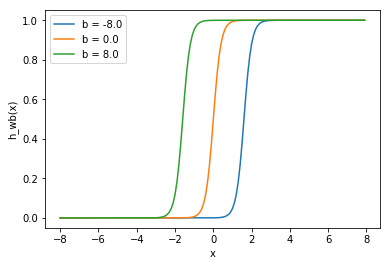

In [17]:
w = 5.0
b1 = -8.0
b2 = 0.0
b3 = 8.0
l1 = 'b = -8.0'
l2 = 'b = 0.0'
l3 = 'b = 8.0'
for b, l in [(b1, l1), (b2, l2), (b3, l3)]:
    f = 1 / (1 + np.exp(-(x*w+b)))
    plt.plot(x, f, label=l)
plt.xlabel('x')
plt.ylabel('h_wb(x)')
plt.legend(loc=2)
plt.show()

# Three Layer Neural Network

In [24]:
from IPython.display import Image
Image(url="http://adventuresinmachinelearning.com/wp-content/uploads/2017/03/Three-layer-network.png")

Layer 1 represents the input layer, where the external input data enters the network. Layer 2 is called the hidden layer as this layer is not part of the input or output. Note: neural networks can have many hidden layers, but in this case for simplicity there is only one. Finally, Layer 3 is the output layer. You can observe the many connections between the layers, in particular between Layer 1 (L1) and Layer 2 (L2). As can be seen, each node in L1 has a connection to all the nodes in L2. Likewise for the nodes in L2 to the single output node L3. Each of these connections will have an associated weight.

# Feed forward example

Build the Layer 1 weight arryay W1 matrix

In [25]:
import numpy as np
w1 = np.array([[0.2, 0.2, 0.2], [0.4, 0.4, 0.4], [0.6, 0.6, 0.6]])

Build the Layer 2 weight array W2 matrix

In [26]:
w2 = np.zeros((1, 3))
w2[0,:] = np.array([0.5, 0.5, 0.5])

Build the Layer 1 and 2 biases b1 and b2

In [27]:
b1 = np.array([0.8, 0.8, 0.8])
b2 = np.array([0.2])

Setup a separate function for the activation function

In [28]:
def f(x):
    return 1 / (1 + np.exp(-x))

In [34]:
def simple_looped_nn_calc(n_layers, x, w, b):
    for l in range(n_layers-1):
        #Setup the input array which the weights will be multiplied by for each layer
        #If it's the first layer, the input array will be the x input vector
        #If it's not the first layer, the input to the next layer will be the 
        #output of the previous layer
        if l == 0:
            node_in = x
        else:
            node_in = h
        #Setup the output array for the nodes in layer l + 1
        h = np.zeros((w[l].shape[0],))
        #loop through the rows of the weight array
        for i in range(w[l].shape[0]):
            #setup the sum inside the activation function
            f_sum = 0
            #loop through the columns of the weight array
            for j in range(w[l].shape[1]):
                f_sum += w[l][i][j] * node_in[j]
            #add the bias
            f_sum += b[l][i]
            #finally use the activation function to calculate the
            #i-th output i.e. h1, h2, h3
            h[i] = f(f_sum)
    return h

This function takes as input the number of layers in the neural network, the x input array/vector, then Python tuples or lists of the weights and bias weights of the network, with each element in the tuple/list representing a layer l in the network.  In other words, the inputs are setup in the following:

In [33]:
w = [w1, w2]
b = [b1, b2]
#a dummy x input vector
x = [1.5, 2.0, 3.0]

In [35]:
simple_looped_nn_calc(3, x, w, b)

array([0.83545566])

In [36]:
def matrix_feed_forward_calc(n_layers, x, w, b):
    for l in range(n_layers-1):
        if l == 0:
            node_in = x
        else:
            node_in = h
        z = w[l].dot(node_in) + b[l]
        h = f(z)
    return h

# Gradient Descent

In [37]:
Image(url="http://adventuresinmachinelearning.com/wp-content/uploads/2017/03/Gradient-descent.jpg")

       To proceed with this method, first the gradient of the error with respect to w is calculated at point “1”. (The gradient is the slope of the error curve at that point.)
       
    * The magnitude of the gradient or the “steepness” of the slope, gives an indication of how fast the error curve or function is changing at that point. 
    
    * The higher the magnitude of the gradient, the faster the error is changing at that point with respect to w.
     
    * This is an iterative method, that involves multiple steps. Each time, the w value is updated according to:
       
       w_new = w_old – α ∗ ∇error
       
       Here w_new denotes the new w position, w_old denotes the current or old w position, ∇error is the gradient of the error at w_old, and α is the step size.

To prevent having a big step of α, optimisation of w is needed. 
As this iterative algorithm approaches the minimum, the gradient or change in the error with each step will reduce. You can see in the graph above that the gradient lines will “flatten out” as the solution point approaches the minimum. As the solution approaches the minimum error, because of the decreasing gradient, it will result in only small improvements to the error.  When the solution approaches this “flattening” out of the error we want to exit the iterative process.  This exit can be performed by either stopping after a certain number of iterations or via some sort of “stop condition”.  This stop condition might be when the change in the error drops below a certain limit, often called the precision.

# Code Example

In [38]:
x_old = 0 # The value does not matter as long as abs(x_new - x_old) > precision
x_new = 6 # The algorithm starts at x=6
gamma = 0.01 # step size
precision = 0.00001

def df(x):
    y = 4 * x**3 - 9 * x**2
    return y

while abs(x_new - x_old) > precision:
    x_old = x_new
    x_new += -gamma * df(x_old)

print("The local minimum occurs at %f" % x_new)

The local minimum occurs at 2.249965


# The Cost function

The gradient descent formula was to reduce the error of the output of the neural network. However, there is another mathematical formula that is more optimized and prevents things like overfitting.
The equivalent cost function of a single training pair (xz, yz) in a neural network is:


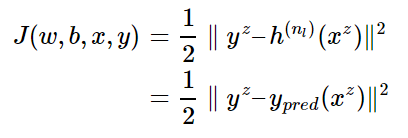

In [46]:
Image(filename=('/Users/ayser/Desktop/formula.PNG'))